In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [4]:
# loading mobility data
data_subset = pd.read_csv(r'.\DataScienceData\mobility\12520739\unzipped\03_02\daily_ct2ct_03_02_0.csv')
data_subset.head()

geoid_o     geoid_d      lng_o      lat_o      lng_d      lat_d  \
0  1001020100  1001020100 -86.490076  32.477185 -86.490076  32.477185   
1  1001020100  1001020200 -86.490076  32.477185 -86.473375  32.474248   
2  1001020100  1001020300 -86.490076  32.477185 -86.460190  32.475428   
3  1001020100  1001020400 -86.490076  32.477185 -86.443624  32.472001   
4  1001020100  1001020500 -86.490076  32.477185 -86.422661  32.458833   

         date  visitor_flows  pop_flows  
0  2020-03-02            176     1742.0  
1  2020-03-02             11      108.0  
2  2020-03-02             13      128.0  
3  2020-03-02             19      188.0  
4  2020-03-02             46      455.0

### This dataset contains mobility data of entire United States of America. Let's restrict ourself to Los Angeles to reduce problem size. 

In [5]:
# Downloading the census tract information of the Los Angeles
la = gpd.read_file(r'.\DataScienceData\mobility\geo boundry\los_angeles\Census_Tracts_2020.shp')
la.head()

OBJECTID    CT20    LABEL    ShapeSTAre    ShapeSTLen  \
0         1  101110  1011.10  1.229562e+07  15083.854287   
1         2  101122  1011.22  2.845774e+07  31671.455844   
2         3  101220  1012.20  7.522093e+06  12698.783810   
3         4  101221  1012.21  3.812000e+06   9161.710543   
4         5  101222  1012.22  3.191371e+06   9980.600461   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28494 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2  POLYGON ((-118.28100 34.25592, -118.28101 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28735 34.2...  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

<AxesSubplot:>

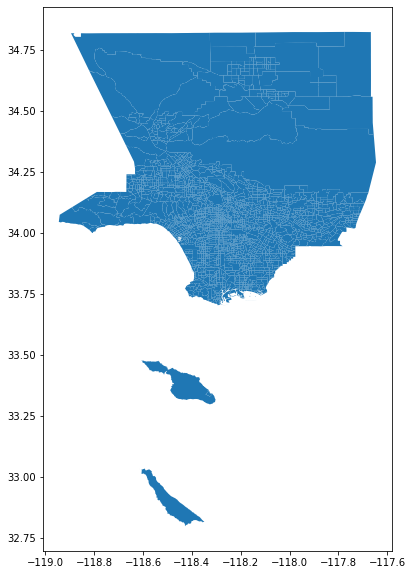

In [6]:
la.plot(figsize=(10, 10))

Perfect! So we have clear defined borders for the Los Angeles state. Also, we know that the StateFP for California is 06 and CountyFP for Los angeles is 037. So let's see the movement where Origin station was in Los angeles. 

In [7]:
LA_origin_data = data_subset[(data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)] 
LA_origin_data.shape

(1158, 9)

So we have 1158 different data rows where origin point was in LA. Let's how may have destination at LA.

In [8]:
LA_destination_data = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000)] 
LA_destination_data.shape

(2209, 9)

Now let's see how many just travelled locally. 

In [9]:
LA_local_movement = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000) & (data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)] 
LA_local_movement.shape

(865, 9)

This data doesn't seems to be enough. Let's loop through all the files. 

In [10]:
for i in range(1,20):
    x = pd.read_csv(r'.\DataScienceData\mobility\12520739\unzipped\03_02\daily_ct2ct_03_02_' + str(i) + '.csv')
    data_subset = pd.concat([data_subset, x], axis=0)
    print(data_subset.shape)

(963598, 9)
(1445397, 9)
(1927196, 9)
(2408995, 9)
(2890794, 9)
(3372593, 9)
(3854392, 9)
(4336191, 9)
(4817990, 9)
(5299789, 9)
(5781588, 9)
(6263387, 9)
(6745186, 9)
(7226985, 9)
(7708784, 9)
(8190583, 9)
(8672382, 9)
(9154181, 9)
(9635987, 9)


Now let's see the internal movement

In [11]:
LA_local_movement = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000) & (data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)]
LA_local_movement.shape

(280730, 9)

In [12]:
LA_local_movement.head()

geoid_o     geoid_d       lng_o      lat_o       lng_d      lat_d  \
52914  6037430902  6037401304 -118.014528  34.134866 -117.812290  34.084984   
52917  6037430902  6037404401 -118.014528  34.134866 -117.916183  34.129228   
52918  6037430902  6037431001 -118.014528  34.134866 -118.005135  34.148412   
52919  6037430902  6037431100 -118.014528  34.134866 -117.997192  34.136076   
52921  6037430902  6037143700 -118.014528  34.134866 -118.356774  34.129185   

             date  visitor_flows  pop_flows  
52914  2020-03-02              1       22.0  
52917  2020-03-02              2       45.0  
52918  2020-03-02             13      297.0  
52919  2020-03-02             16      366.0  
52921  2020-03-02              1       22.0

Now that is some decent amount of data. Let's plot first locations on interactive map to verify.

In [13]:
import folium
LA_map = folium.Map(location=[33.976848,-118.216677], zoom_start=10)
folium.Marker([34.134866, -118.014528], popup= 1).add_to(LA_map)
LA_map

Perfect! Now let's see which census tracts have most visitors.

In [14]:
visitor_by_cesus_tract = LA_local_movement.groupby(['geoid_d']).sum()['visitor_flows']
visitor_by_cesus_tract

geoid_d
6037101110    355
6037101122    216
6037101210    433
6037101220    214
6037101300    464
             ... 
6037980031    487
6037980033    469
6037990100      2
6037990200      3
6037990300      1
Name: visitor_flows, Length: 2346, dtype: int64

In [15]:
# census tract with most visitors
visitor_by_cesus_tract.idxmax()

6037980028

Plotting it on the graph using the lat long for the destination

In [16]:
LA_local_movement[LA_local_movement['geoid_d'] == 6037980028].iloc[0]

geoid_o          6037430400
geoid_d          6037980028
lng_o            -118.02587
lat_o             34.162516
lng_d           -118.413523
lat_d             33.939855
date             2020-03-02
visitor_flows             1
pop_flows              22.0
Name: 66424, dtype: object

In [17]:
folium.Marker([33.939855, -118.413523], popup= 6037980028).add_to(LA_map)
LA_map

We can see that the new marker is at Los Angeles internation airport. This makes sense as it could be the place where most trips end.

Census tracts are defined by population and doesn't have a fixed area. There are some census tracts that are massive in size and it may become hard to define where we can place charging station in them. 
Let's see how the map looks like when we remove largest 5% of the census tracts.

In [18]:
# We know that there are 2495 cesus tracts in Los Angeles, so 5% will be 125 
big_census_tracts = la.nlargest(125, 'ShapeSTAre')
big_census_tracts

OBJECTID    CT20    LABEL    ShapeSTAre     ShapeSTLen  \
2458      2459  930400  9304.00  1.608512e+10  945040.664102   
2425      2426  920102  9201.02  6.692471e+09  429191.043037   
2345      2346  901209  9012.09  6.428813e+09  568504.396588   
2397      2398  910815  9108.15  5.073502e+09  484681.336642   
2305      2306  900102  9001.02  4.743388e+09  321319.282729   
...        ...     ...      ...           ...            ...   
2479      2480  980021  9800.21  7.475771e+07   51403.146970   
1181      1182  400209  4002.09  7.388779e+07   40593.924234   
2236      2237  670702  6707.02  7.310262e+07   61559.676313   
2409      2410  920031  9200.31  7.277049e+07   51825.649307   
1464      1465  460800  4608.00  7.258609e+07   42259.730094   

                                               geometry  
2458  POLYGON ((-117.97230 34.43878, -117.97221 34.4...  
2425  POLYGON ((-118.76591 34.75362, -118.76576 34.7...  
2345  POLYGON ((-118.89265 34.81793, -118.89137 34.8...  
2397  POLYGON ((-118.06793 34.52817, -118.06528 34.5...  
2305  POLYGON ((-117.73551 34.82322, -117.73175 34.8...  
...                                                 ...  
2479  POLYGON ((-118.36146 34.27318, -118.36152 34.2...  
1181  POLYGON ((-117.74167 34.14311, -117.74177 34.1...  
2236  POLYGON ((-118.31830 33.77491, -118.31832 33.7...  
2409  POLYGON ((-118.50084 34.41277, -118.50080 34.4...  
1464  POLYGON ((-118.17244 34.18029, -118.17196 34.1...  

[125 rows x 6 columns]

<AxesSubplot:>

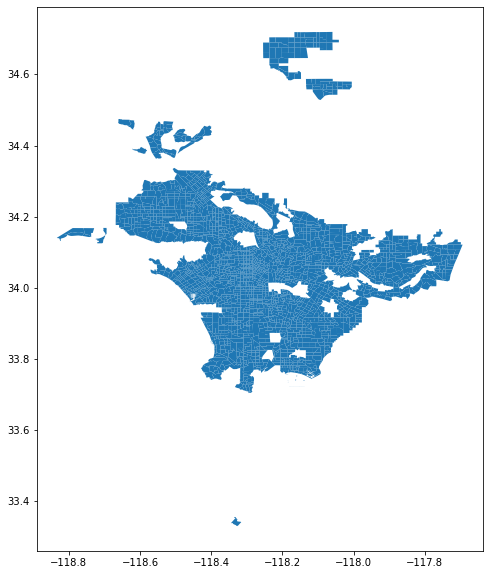

In [19]:
reduced_la = la.loc[~la['OBJECTID'].isin(big_census_tracts['OBJECTID'])]
reduced_la.plot(figsize=(10, 10))

The census tracts sizes look more homogenous now. Also, we know that the tract at the bottom of the map is on an island. So let's remove that as well. With a separate check we know that the id of this census tract is <b>599000</b>, let's remove it. 

<AxesSubplot:>

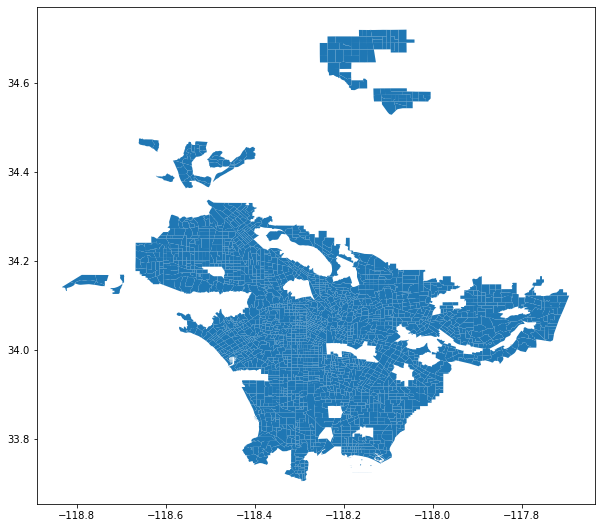

In [20]:
reduced_la = reduced_la.loc[reduced_la['CT20'] != '599000']
reduced_la.plot(figsize=(10, 10))

Now we can reduce the mobility data to only have these census tracts.

In [21]:
LA_local_movement = LA_local_movement.loc[LA_local_movement['geoid_o'].isin(('6037' + reduced_la['CT20']).astype(np.int64))]

In [22]:
LA_local_movement.head()

geoid_o     geoid_d       lng_o      lat_o       lng_d      lat_d  \
52914  6037430902  6037401304 -118.014528  34.134866 -117.812290  34.084984   
52917  6037430902  6037404401 -118.014528  34.134866 -117.916183  34.129228   
52918  6037430902  6037431001 -118.014528  34.134866 -118.005135  34.148412   
52919  6037430902  6037431100 -118.014528  34.134866 -117.997192  34.136076   
52921  6037430902  6037143700 -118.014528  34.134866 -118.356774  34.129185   

             date  visitor_flows  pop_flows  
52914  2020-03-02              1       22.0  
52917  2020-03-02              2       45.0  
52918  2020-03-02             13      297.0  
52919  2020-03-02             16      366.0  
52921  2020-03-02              1       22.0

We can keep this dataframe for later. To do some quick experiments let's take a small section of the city.  
Taking all the census tracts beteen these points:
1. 34.035271, -118.305195
2. 34.035271, -118.174719
3. 33.962478, -118.174719
4. 33.962478, -118.305195

In [23]:
LA_Section = LA_local_movement[(LA_local_movement['lng_o'] <= -118.174719) & (LA_local_movement['lng_o'] >= -118.305195) & (LA_local_movement['lat_o'] <= 34.035271) & (LA_local_movement['lat_o'] >= 33.962478) & (LA_local_movement['lng_d'] <= -118.174719) & (LA_local_movement['lng_d'] >= -118.305195) & (LA_local_movement['lat_d'] <= 34.035271) & (LA_local_movement['lat_d'] >= 33.962478)]
LA_Section.shape

(4040, 9)

Let's see the shape on the map

In [24]:
reduced_la['geometry']

0       POLYGON ((-118.28491 34.25948, -118.28494 34.2...
1       POLYGON ((-118.29015 34.27417, -118.29015 34.2...
2       POLYGON ((-118.28100 34.25592, -118.28101 34.2...
3       POLYGON ((-118.28735 34.25591, -118.28735 34.2...
4       POLYGON ((-118.28594 34.25405, -118.28594 34.2...
                              ...                        
2486    POLYGON ((-118.42756 33.91633, -118.42223 33.9...
2489    POLYGON ((-118.05521 33.91712, -118.05521 33.9...
2492    POLYGON ((-118.28411 33.80773, -118.28357 33.8...
2493    POLYGON ((-118.36674 34.01539, -118.36719 34.0...
2494    POLYGON ((-118.34718 34.14218, -118.34692 34.1...
Name: geometry, Length: 2369, dtype: geometry

<AxesSubplot:>

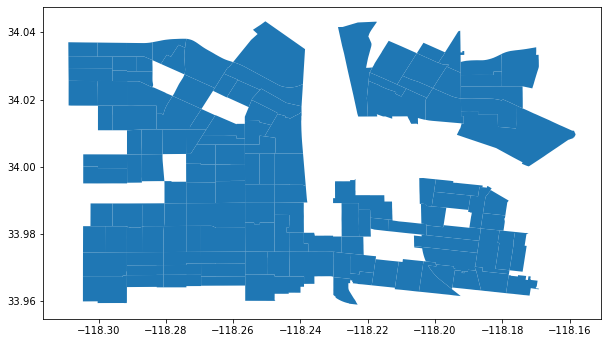

In [25]:
LA_Section_Map = reduced_la.loc[('6037' + reduced_la['CT20']).isin(LA_Section['geoid_d'].unique().astype(str))]
LA_Section_Map.plot(figsize=(10, 10))

## COOL! Now let's try contacting the Valhalla server from his notebook.

In [42]:
import requests
import json

data = {"locations":[{"lat":33.989773,"lon":-118.275906,"type":"break"},{"lat":33.982729,"lon":-118.270887,"type":"break"}],"costing":"auto","directions_options":{"units":"kilometers"}}

try:
    r = requests.post(url='http://"iPV4 address of EC2 instance":8002/route', json=data, timeout=1)
    print(r.text)
except:
    pass

{"trip":{"locations":[{"type":"break","lat":33.989773,"lon":-118.275906,"original_index":0},{"type":"break","lat":33.982729,"lon":-118.270887,"side_of_street":"right","original_index":1}],"legs":[{"maneuvers":[{"type":1,"instruction":"Drive east on West 58th Street.","verbal_succinct_transition_instruction":"Drive east. Then Turn right onto South Main Street.","verbal_pre_transition_instruction":"Drive east on West 58th Street. Then Turn right onto South Main Street.","verbal_post_transition_instruction":"Continue for 200 meters.","street_names":["West 58th Street"],"time":21.808,"length":0.181,"cost":26.169,"begin_shape_index":0,"end_shape_index":2,"verbal_multi_cue":true,"travel_mode":"drive","travel_type":"car"},{"type":10,"instruction":"Turn right onto South Main Street.","verbal_transition_alert_instruction":"Turn right onto South Main Street.","verbal_succinct_transition_instruction":"Turn right.","verbal_pre_transition_instruction":"Turn right onto South Main Street.","verbal_po

### Awesome possom. Now we can try to get route for all the trpis in the LA Section 

In [38]:
# But first reset the index of the LA_Section dataframe 
LA_Section = LA_Section.reset_index(drop=True)

# And add a placeholder column to populate with route information
LA_Section["route"] = ""

In [46]:
from tqdm import tqdm

for i in tqdm(range(len(LA_Section))):
    data = {"locations":[{"lat":LA_Section['lat_o'][i],"lon":LA_Section['lng_o'][i],"type":"break"},{"lat":LA_Section['lat_d'][i],"lon":LA_Section['lng_d'][i],"type":"break"}],"costing":"auto","directions_options":{"units":"kilometers"}}
    
    try:
        r = requests.post(url='http://"iPV4 address of EC2 instance":8002/route', json=data, timeout=1)
        LA_Section["route"][i] = r.text
    except:
        pass

  0%|                                                                                         | 0/4040 [00:00<?, ?it/s]C:\Users\Vishal\AppData\Local\Temp/ipykernel_10180/1289874434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LA_Section["route"][i] = r.text
100%|██████████████████████████████████████████████████████████████████████████████| 4040/4040 [06:06<00:00, 11.01it/s]


### Let's save the data to a file. 

In [56]:
LA_Section.to_csv("Save it locally/laSectionTraffic.csv")